<a href="https://colab.research.google.com/github/G-K-Saber/OpenGLMeshLoader/blob/main/Assignment2CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files

In [16]:
def plot_histograms(image_path, output_name=''):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        raise ValueError(f"Could not read the image at {image_path}")

    hist = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
    cum_hist = np.cumsum(hist)

    # Normalize histograms
    hist_norm = hist / hist.max() * 512
    cum_hist_norm = cum_hist / cum_hist.max() * 512

    width, height = 1024, 512
    hist_img = np.ones((height, width, 3), dtype=np.uint8) * 255
    bin_width = int(width / 256)

    for i in range(256):
        cv2.line(hist_img, (i * bin_width, height),
                 (i * bin_width, height - int(hist_norm[i])),
                 (0, 0, 0), 1)
        cv2.line(hist_img, (i * bin_width, height - int(cum_hist_norm[i])),
                 (i * bin_width, height - int(cum_hist_norm[i])),
                 (255, 0, 0), 1)

    cv2.imwrite(output_name, hist_img)
    plt.figure(figsize=(10, 5))
    plt.imshow(hist_img)
    plt.title("Histogram and Cumulative Histogram")
    plt.axis('off')
    plt.show()

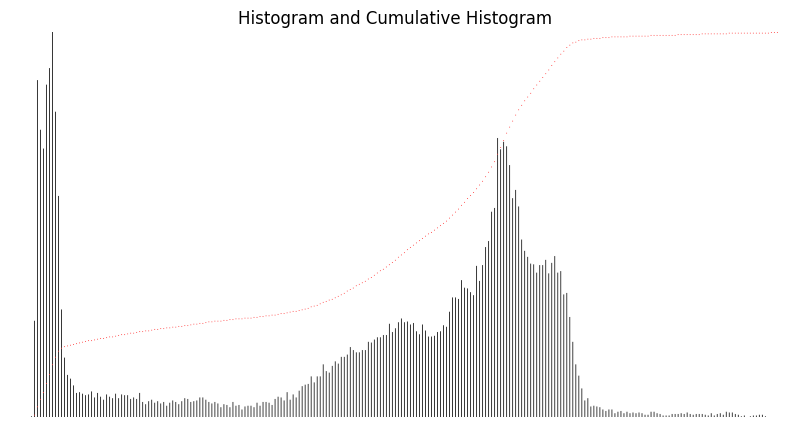

In [17]:
plot_histograms('cameraman.png', 'output_hist_cameraman.png')


In [18]:
def mean_vs_gaussian(image_path):
    # Load grayscale image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        raise ValueError("Could not load image.")

    # Apply 5x5 Mean filter
    mean_filtered = cv2.blur(img, (5, 5))

    # Apply 5x5 Gaussian filter
    gaussian_filtered = cv2.GaussianBlur(img, (5, 5), 0)

    # Helper: plot image and histogram
    def show_image_and_hist(image, title):
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"{title} Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.plot(hist, color='black')
        plt.title(f"{title} Histogram")
        plt.xlim([0, 256])
        plt.grid(True)
        plt.show()

    # Show all
    show_image_and_hist(mean_filtered, "Mean Filter (5x5)")
    show_image_and_hist(gaussian_filtered, "Gaussian Filter (5x5)")

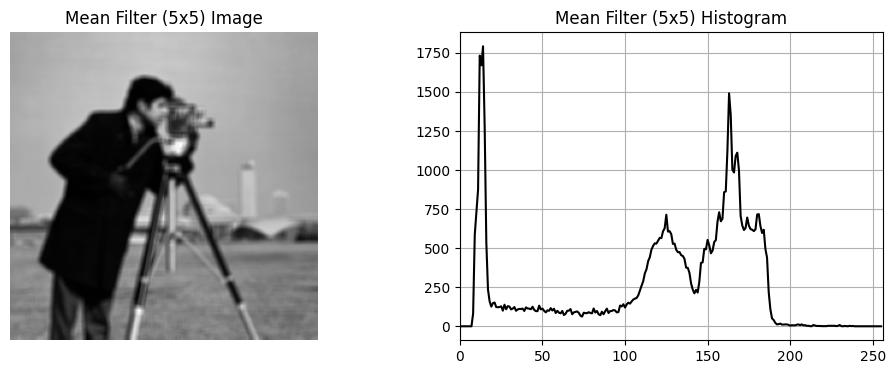

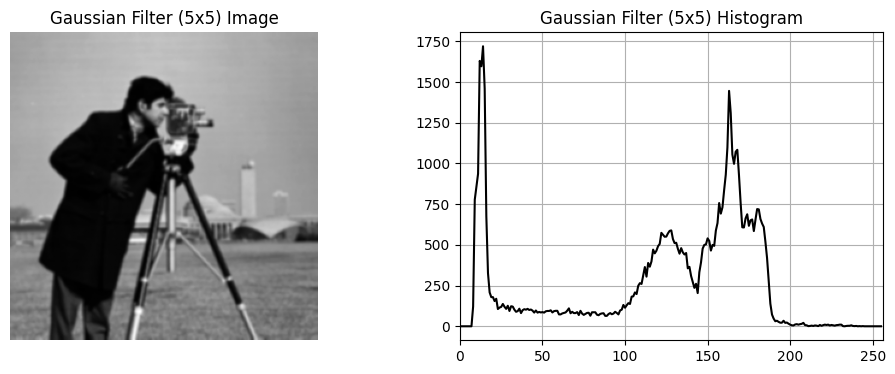

In [19]:
mean_vs_gaussian("cameraman.png")

In [20]:
def apply_median_filter(image_path):
    # Load noisy image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        raise ValueError("Image could not be loaded.")

    # Apply 5x5 Median filter
    filtered_img = cv2.medianBlur(img, 5)

    # Helper to show image and histogram
    def show_image_and_hist(image, title):
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"{title} Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.plot(hist, color='black')
        plt.title(f"{title} Histogram")
        plt.grid(True)
        plt.xlim([0, 256])
        plt.show()

    # Show both
    show_image_and_hist(img, "Original (with Noise)")
    show_image_and_hist(filtered_img, "Filtered (Median 5x5)")

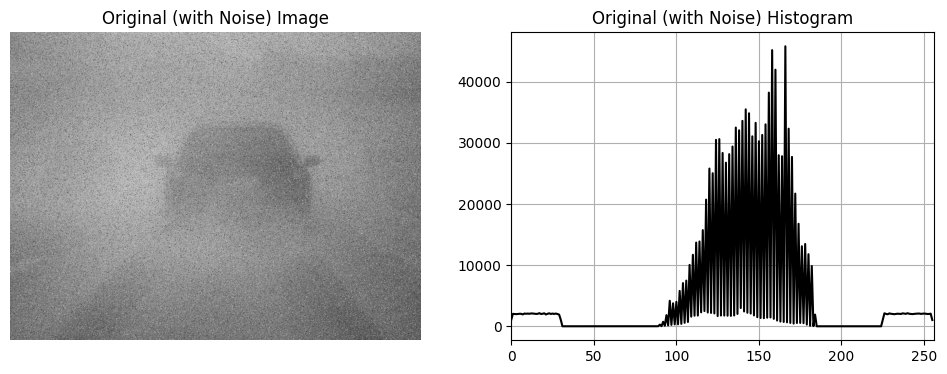

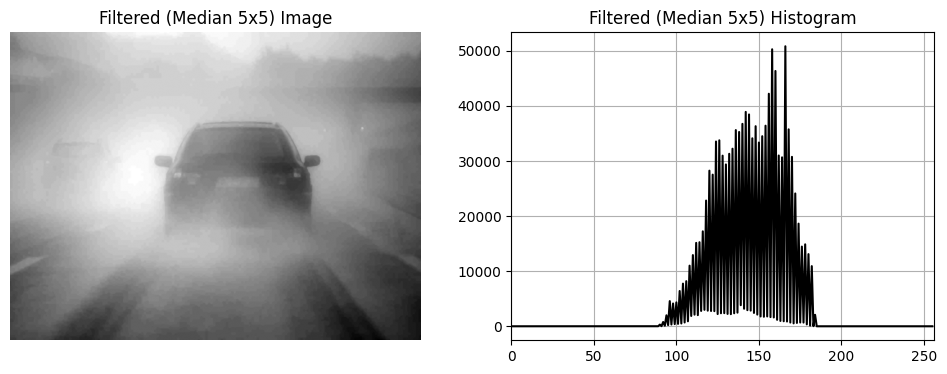

In [21]:
apply_median_filter("fognoise.png")

In [22]:
def contrast_and_equalization(image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Could not load image.")

    # --- Contrast Stretching ---
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = ((img - min_val) / (max_val - min_val) * 255).astype(np.uint8)

    # --- Histogram Equalization ---
    equalized = cv2.equalizeHist(img)

    # Helper to display image + histogram
    def show(image, title):
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"{title} Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.plot(hist, color='black')
        plt.title(f"{title} Histogram")
        plt.grid(True)
        plt.xlim([0, 256])
        plt.show()

    # Show all results
    show(stretched, "Contrast Stretching")
    show(equalized, "Histogram Equalization")

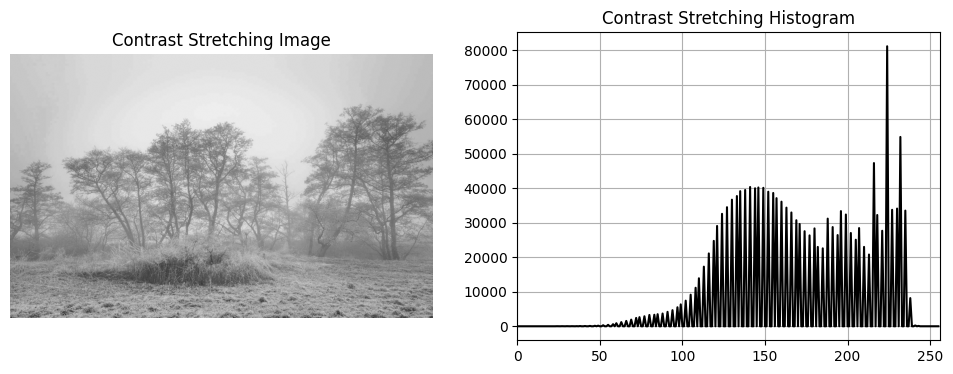

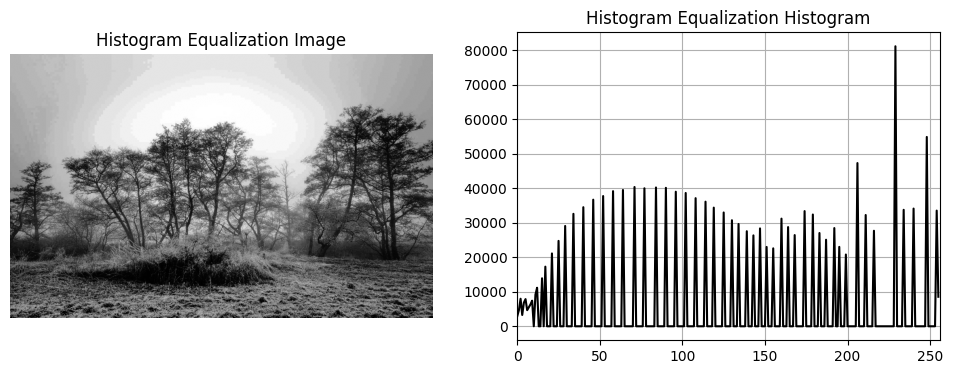

In [23]:
contrast_and_equalization("frostfog.png")